In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, validation_curve, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the breast cancer dataset
cancer = load_breast_cancer(as_frame=True)
df = cancer.frame

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

In [5]:
# --- Data Pre-processing ---

# 1. Identify and Handle Missing Data
# Check for missing values
print("Missing values before imputation:")
print(X.isnull().sum())

Missing values before imputation:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


In [ ]:
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

print("\nMissing values after imputation:")
print(X_imputed.isnull().sum())

In [6]:
X_processed = X.copy()

In [7]:
# 4. Split Data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42, stratify=y, shuffle=True)

In [8]:
# 5. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Convert scaled arrays back to DataFrames for easier handling if needed
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [10]:
# --- Model Training ---

# 1. Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled_df, y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
# 2. Logistic Regression Model
lr_model = LogisticRegression(random_state=42, solver='liblinear')
lr_model.fit(X_train_scaled_df, y_train)

LogisticRegression(random_state=42, solver='liblinear')

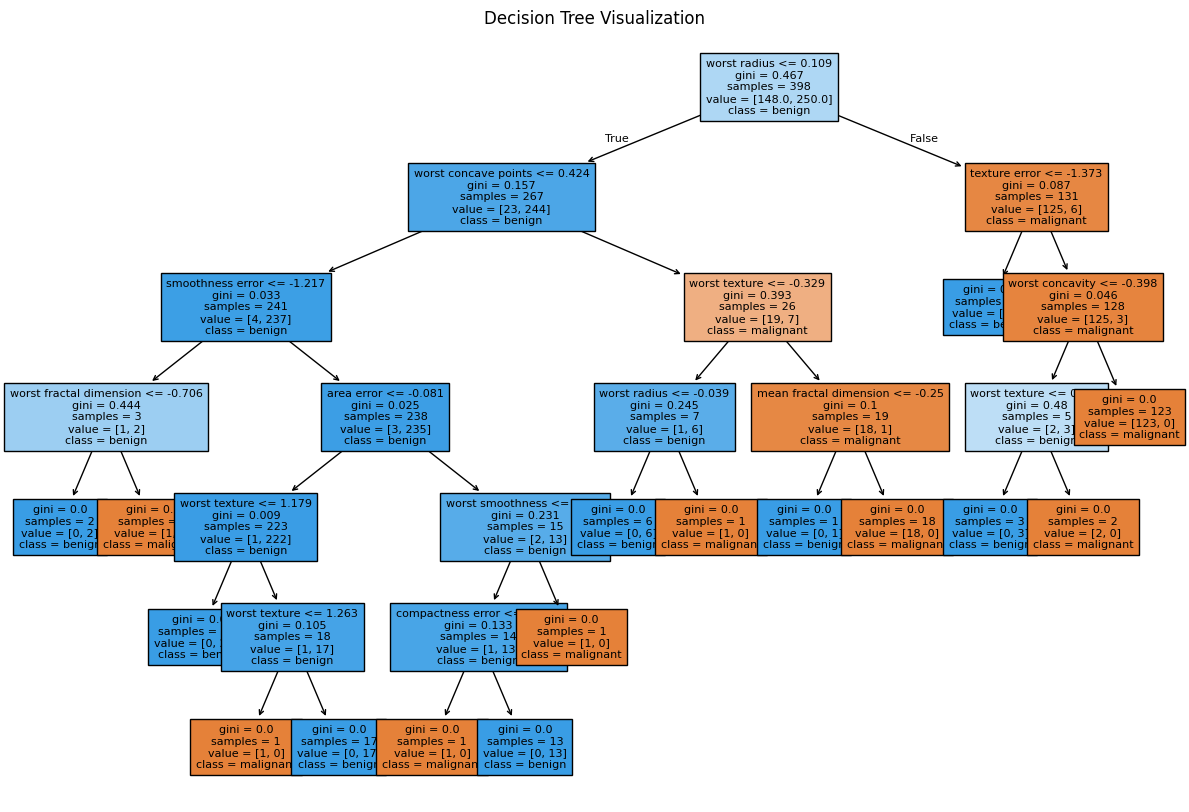

In [12]:
# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=X_train.columns, class_names=cancer.target_names, filled=True, fontsize=8)
plt.title("Decision Tree Visualization")
plt.show()


--- Base Model Evaluation ---

Decision Tree:
              precision    recall  f1-score   support

   malignant       0.89      0.89      0.89        64
      benign       0.93      0.93      0.93       107

    accuracy                           0.92       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171



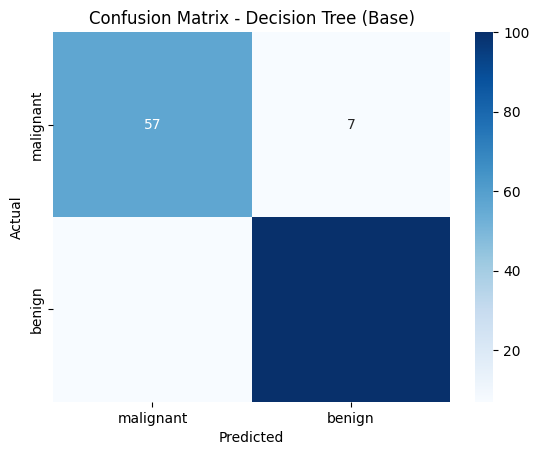

In [13]:
# --- Model Validation ---

# Evaluate base models on the test set
print("\n--- Base Model Evaluation ---")

# Decision Tree
dt_predictions = dt_model.predict(X_test_scaled_df)
print("\nDecision Tree:")
print(classification_report(y_test, dt_predictions, target_names=cancer.target_names))
cm_dt = confusion_matrix(y_test, dt_predictions)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree (Base)')
plt.show()


Logistic Regression:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        64
      benign       0.99      0.99      0.99       107

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



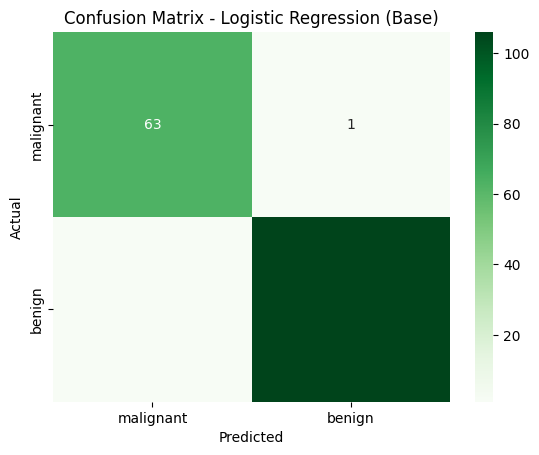

In [14]:
# Logistic Regression
lr_predictions = lr_model.predict(X_test_scaled_df)
print("\nLogistic Regression:")
print(classification_report(y_test, lr_predictions, target_names=cancer.target_names))
cm_lr = confusion_matrix(y_test, lr_predictions)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens',
            xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression (Base)')
plt.show()

In [15]:
# --- Cross-Validation ---

print("\n--- Cross-Validation ---")

# Decision Tree
dt_cv_scores = cross_val_score(DecisionTreeClassifier(random_state=42),
                                X_train_scaled_df, y_train, cv=5, scoring='accuracy')
print(f"Decision Tree Cross-Validation Accuracy Scores: {dt_cv_scores}")
print(f"Decision Tree Mean Cross-Validation Accuracy: {dt_cv_scores.mean():.4f}")

# Logistic Regression
lr_cv_scores = cross_val_score(LogisticRegression(random_state=42, solver='liblinear'),
                                X_train_scaled_df, y_train, cv=5, scoring='accuracy')
print(f"\nLogistic Regression Cross-Validation Accuracy Scores: {lr_cv_scores}")
print(f"Logistic Regression Mean Cross-Validation Accuracy: {lr_cv_scores.mean():.4f}")



--- Cross-Validation ---
Decision Tree Cross-Validation Accuracy Scores: [0.8875     0.9625     0.875      0.96202532 0.93670886]
Decision Tree Mean Cross-Validation Accuracy: 0.9247

Logistic Regression Cross-Validation Accuracy Scores: [0.9875     0.95       0.9875     0.98734177 0.98734177]
Logistic Regression Mean Cross-Validation Accuracy: 0.9799



--- Learning Curve ---


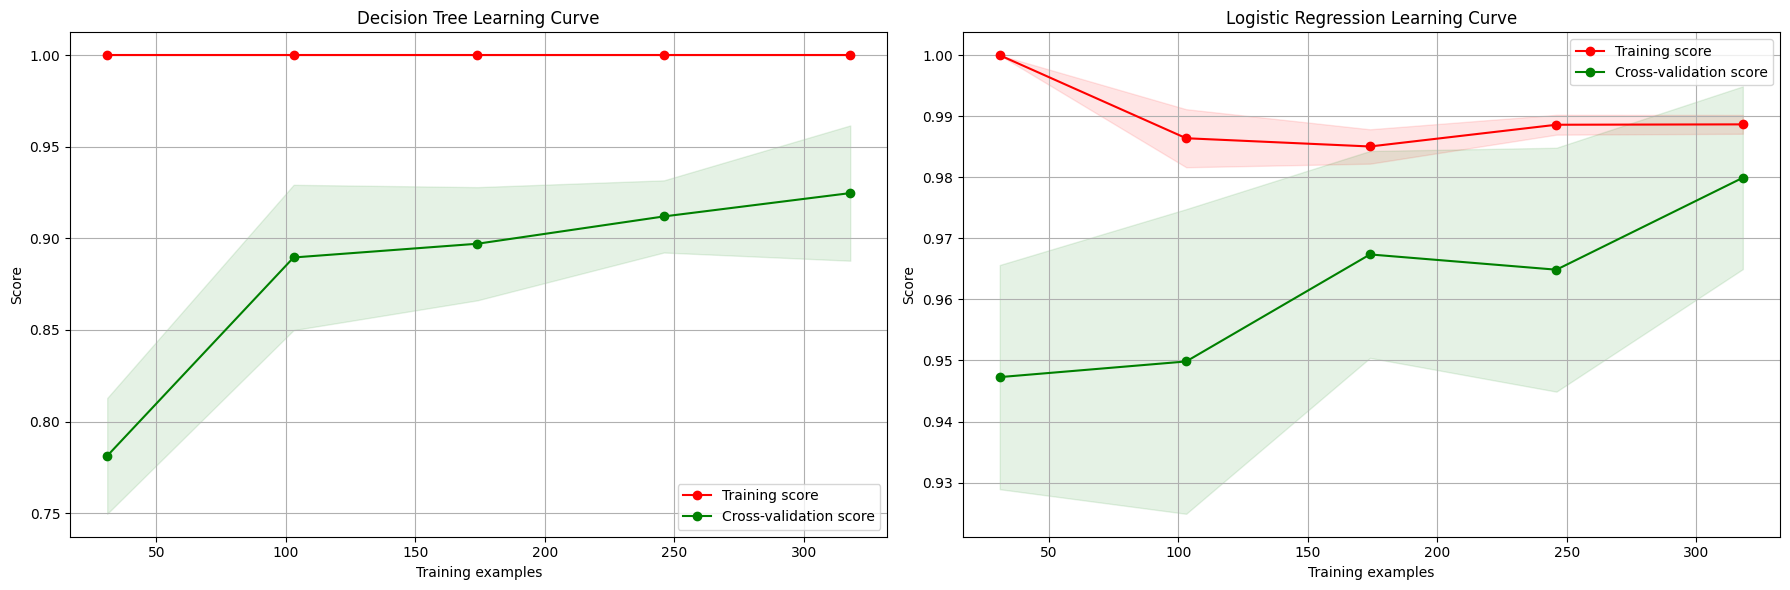

In [16]:
# --- Learning Curve ---

print("\n--- Learning Curve ---")

def plot_learning_curve(estimator, title, X, y, axes=None, train_sizes=np.linspace(0.1, 1.0, 5), cv=None, scoring='accuracy'):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(10, 6))

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, train_sizes=train_sizes, cv=cv, scoring=scoring, n_jobs=-1
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    axes.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axes.set_title(title)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")
    axes.grid()
    axes.legend(loc="best")
    return plt

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
plot_learning_curve(DecisionTreeClassifier(random_state=42), "Decision Tree Learning Curve",
                    X_train_scaled_df, y_train, axes=axes[0], cv=5, scoring='accuracy')
plot_learning_curve(LogisticRegression(random_state=42, solver='liblinear'), "Logistic Regression Learning Curve",
                    X_train_scaled_df, y_train, axes=axes[1], cv=5, scoring='accuracy')
plt.tight_layout()
plt.show()


In [18]:
# --- Validation Curves ---

print("\n--- Validation Curves ---")

def plot_validation_curve(estimator, title, X, y, param_name, param_range, cv=None, scoring='accuracy'):
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=-1
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    plt.semilogx(param_range, train_scores_mean, 'o-', label="Training score", color="r")
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.semilogx(param_range, test_scores_mean, 'o-', label="Cross-validation score", color="g")
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.grid()
    plt.legend(loc="best")
    plt.show()


--- Validation Curves ---


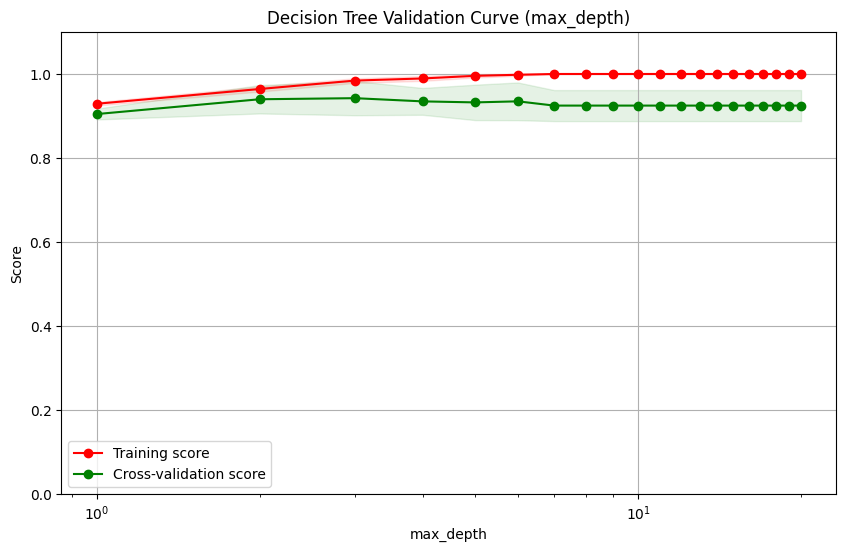

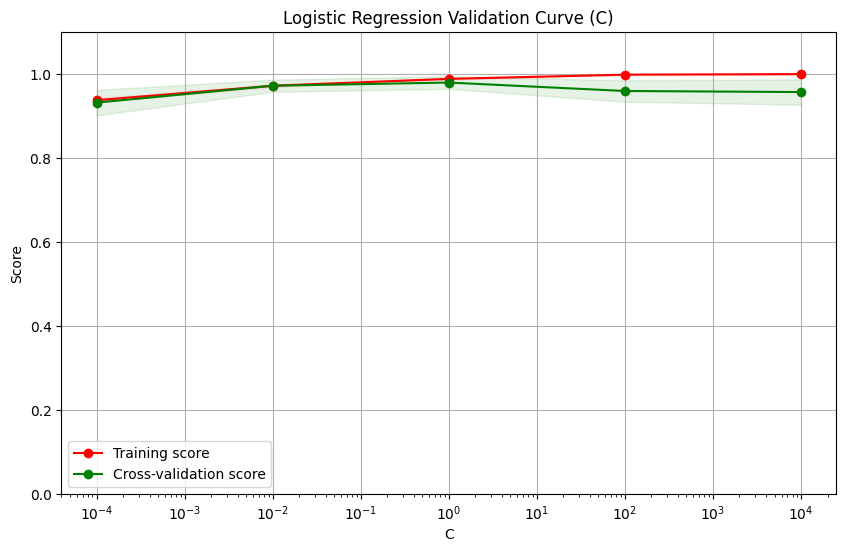

In [19]:
# Decision Tree - Validation Curve (max_depth)
param_range_dt = np.arange(1, 21)
plot_validation_curve(DecisionTreeClassifier(random_state=42),
                        "Decision Tree Validation Curve (max_depth)",
                        X_train_scaled_df, y_train,
                        param_name="max_depth", param_range=param_range_dt, cv=5, scoring='accuracy')

# Logistic Regression - Validation Curve (C)
param_range_lr = np.logspace(-4, 4, 5)
plot_validation_curve(LogisticRegression(random_state=42, solver='liblinear'),
                        "Logistic Regression Validation Curve (C)",
                        X_train_scaled_df, y_train,
                        param_name="C", param_range=param_range_lr, cv=5, scoring='accuracy')

In [20]:
# --- Hyperparameter Tuning using Grid Search CV ---

print("\n--- Hyperparameter Tuning using Grid Search CV ---")

# Decision Tree
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(3, 15),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [3, 4, 5]
}
dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                               param_grid=dt_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
dt_grid_search.fit(X_train_scaled_df, y_train)

print("\nDecision Tree Best Parameters:", dt_grid_search.best_params_)
dt_best_model = dt_grid_search.best_estimator_


--- Hyperparameter Tuning using Grid Search CV ---

Decision Tree Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}


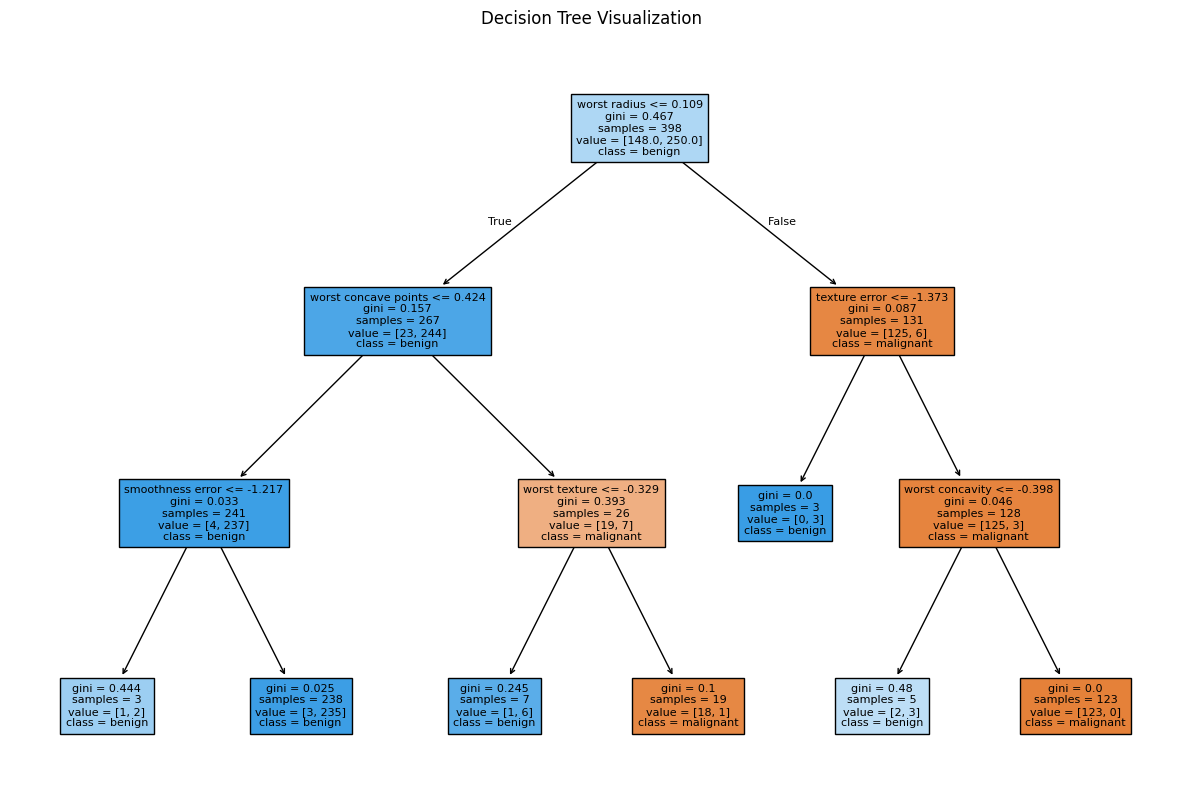

In [21]:
# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dt_best_model, feature_names=X_train.columns, class_names=cancer.target_names, filled=True, fontsize=8)
plt.title("Decision Tree Visualization")
plt.show()

In [22]:
# Logistic Regression
lr_param_grid = {
    'C': np.logspace(-4, 4, 10),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
lr_grid_search = GridSearchCV(LogisticRegression(random_state=42),
                               param_grid=lr_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
lr_grid_search.fit(X_train_scaled_df, y_train)

print("\nLogistic Regression Best Parameters:", lr_grid_search.best_params_)
lr_best_model = lr_grid_search.best_estimator_


Logistic Regression Best Parameters: {'C': 0.3593813663804626, 'penalty': 'l1', 'solver': 'liblinear'}



--- Confusion Matrix for Base and Tuned Models ---

Decision Tree (Tuned):
              precision    recall  f1-score   support

   malignant       0.92      0.88      0.90        64
      benign       0.93      0.95      0.94       107

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171



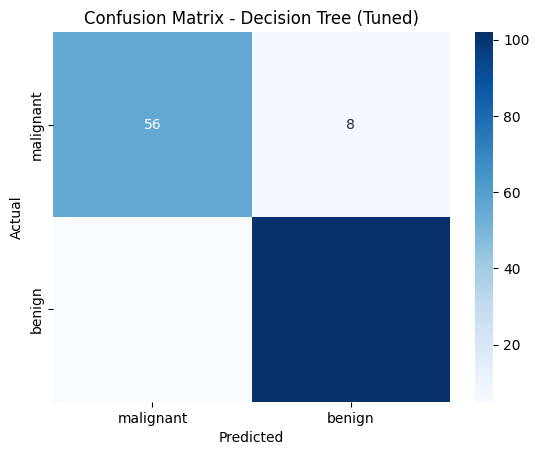

In [23]:
# --- Confusion Matrix for Base and Tuned Models ---

print("\n--- Confusion Matrix for Base and Tuned Models ---")

# Decision Tree
dt_tuned_predictions = dt_best_model.predict(X_test_scaled_df)
print("\nDecision Tree (Tuned):")
print(classification_report(y_test, dt_tuned_predictions, target_names=cancer.target_names))
cm_dt_tuned = confusion_matrix(y_test, dt_tuned_predictions)
sns.heatmap(cm_dt_tuned, annot=True, fmt='d', cmap='Blues',
            xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree (Tuned)')
plt.show()


Logistic Regression (Tuned):
              precision    recall  f1-score   support

   malignant       0.94      0.95      0.95        64
      benign       0.97      0.96      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



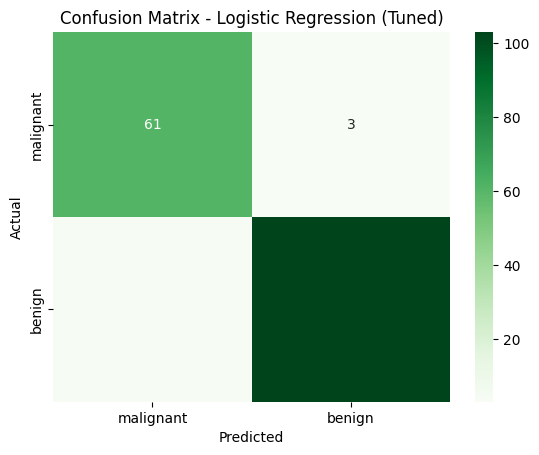

In [25]:
# Logistic Regression
lr_tuned_predictions = lr_best_model.predict(X_test_scaled_df)
print("\nLogistic Regression (Tuned):")
print(classification_report(y_test, lr_tuned_predictions, target_names=cancer.target_names))
cm_lr_tuned = confusion_matrix(y_test, lr_tuned_predictions)
sns.heatmap(cm_lr_tuned, annot=True, fmt='d', cmap='Greens',
            xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression (Tuned)')
plt.show()